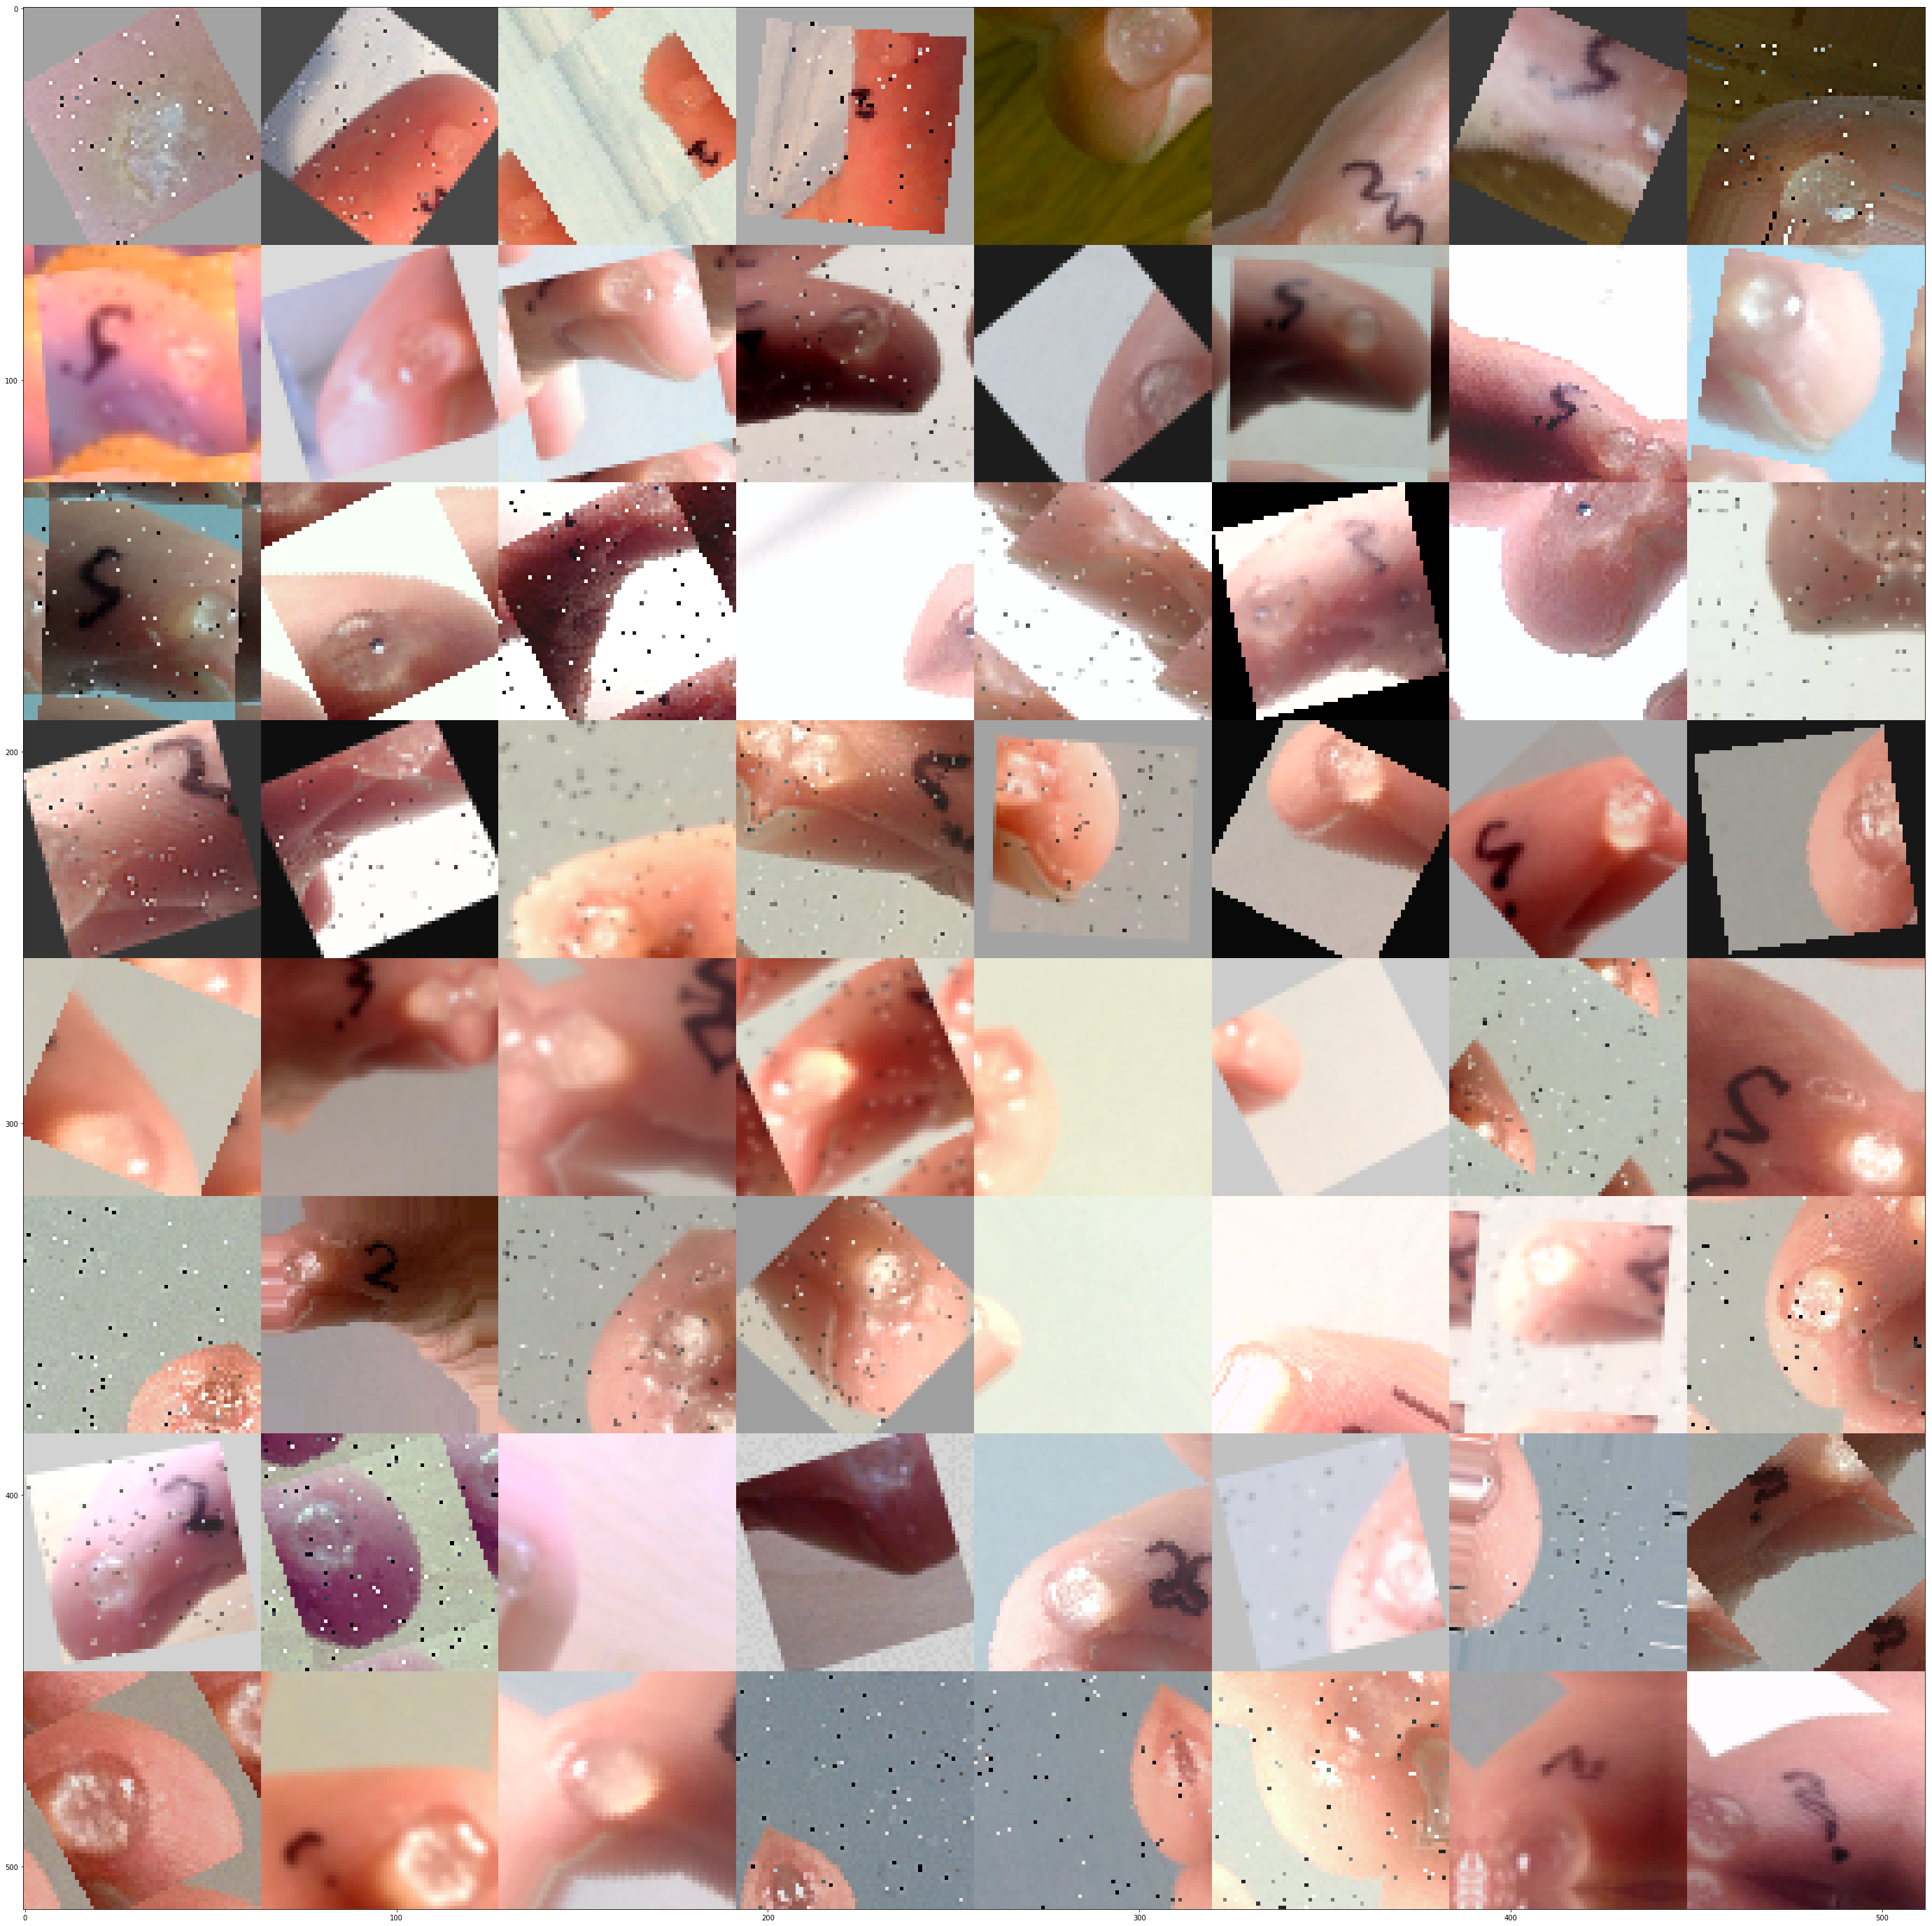

In [3]:
%matplotlib inline

import numpy as np
import os
# os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '1'
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

import cv2
import pudb
import datetime
import time
import sys
import fnmatch
import random
from imgaug import augmenters as iaa
import imgaug as ia
import matplotlib.pyplot as plt
from scipy import misc

hists_test = np.load("hists_test.npy")
labels_test = np.load("labels_test.npy")
hists_train = np.load("hists_train.npy")
labels_train = np.load("labels_train.npy")

sometimes = lambda aug: iaa.Sometimes(0.5, aug)

imgaug_seq = iaa.Sequential([
    sometimes([
        iaa.SaltAndPepper(p=0.02),
    ]),
    iaa.OneOf([
        iaa.GaussianBlur(sigma=(0, 1.0)), # blur images with a sigma of 0 to 3.
        iaa.Sharpen(alpha=(0, 0.1), lightness=(0.75, 1.0))
    ]),
    iaa.ContrastNormalization((1.0, 1.5), per_channel=0.2),
    iaa.Add((-25, 50), per_channel=0.0), # change brightness of images (by -10 to 10 of original value)
    iaa.Add((-5, 5), per_channel=1.0), # change brightness of images (by -10 to 10 of original value)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Affine(
            scale={"x": (0.8, 0.85), "y": (0.8, 0.85)}, # scale images to 80-120% of their size, individually per axis
            # translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-2, 2), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
    )
])

# Use this to show augmented images
fig = plt.figure(figsize=(50, 50))  # width, height in inches
pos_idx = np.where(labels_train[:,]==1)[0]
tstimages = hists_train[pos_idx[0:64]]
for i in range(64):
    tstimages[i] = cv2.cvtColor(tstimages[i], cv2.COLOR_BGR2RGB)
tstimages = imgaug_seq.augment_images(tstimages)
plt.imshow(ia.draw_grid(tstimages, cols=8))